In [1]:
import sys
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
import pickle
# Add the workspace root to the Python path
workspace_root = os.path.abspath("..")
if workspace_root not in sys.path:
    sys.path.append(workspace_root)
mne.set_log_level('ERROR')
from Pipeline import pre_HA_denoise, detect_HA_outliers

subject = 601
detection = detect_HA_outliers(subject, threshold=6)

c:\Users\gmoha\Downloads\git\preprocessing_pipline\functions.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  xyz_data = pd.read_csv(ch_location_path, delim_whitespace=True, skiprows=1, header=None)
c:\Users\gmoha\Downloads\git\preprocessing_pipline\functions.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  xyz_data = pd.read_csv(ch_location_path, delim_whitespace=True, skiprows=1, header=None)


In [1]:
import sys
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
import pickle
# Add the workspace root to the Python path
workspace_root = os.path.abspath("..")
if workspace_root not in sys.path:
    sys.path.append(workspace_root)
mne.set_log_level('ERROR')
from Pipeline import  detect_HA_outliers

with open(os.path.join(workspace_root,'Data', 'artifacts.pkl'), "rb") as f:
    all_bads = pickle.load(f)

subjects = np.arange(601, 619)
all_detected = []
for subject in subjects:
    detection = detect_HA_outliers(subject, threshold=6)
    all_bads[subject]['detection'] = detection
    all_detected.append(detection)

with open(os.path.join(workspace_root, 'Data', 'artifacts.pkl'), "wb") as f:
    pickle.dump(all_bads, f)


c:\Users\gmoha\Downloads\git\preprocessing_pipline\functions.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  xyz_data = pd.read_csv(ch_location_path, delim_whitespace=True, skiprows=1, header=None)
c:\Users\gmoha\Downloads\git\preprocessing_pipline\functions.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  xyz_data = pd.read_csv(ch_location_path, delim_whitespace=True, skiprows=1, header=None)
c:\Users\gmoha\Downloads\git\preprocessing_pipline\functions.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  xyz_data = pd.read_csv(ch_location_path, delim_whitespace=True, skiprows=1, header=None)
c:\Users\gmoha\Downloads\git\preprocessing_pipline\functions.py:25: FutureWarning: The 'delim_whi

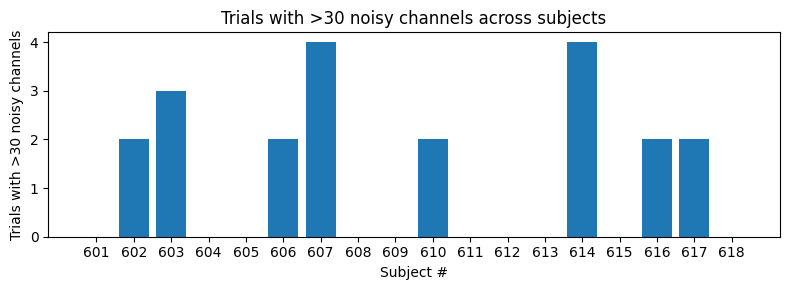

In [12]:

auto_remove = []
for det in all_detected:
    noisy_counts = det.T.sum(axis=1)
    auto_remove.append(np.sum(noisy_counts > 30))

plt.figure(figsize=(8, 3))
plt.bar(np.arange(1, len(subjects)+1), auto_remove)
# Set x-ticks to subject numbers
plt.xticks(np.arange(1, len(subjects)+1), subjects)
plt.xlabel('Subject #')
plt.ylabel('Trials with >30 noisy channels')
plt.title('Trials with >30 noisy channels across subjects')
plt.tight_layout()
plt.show()


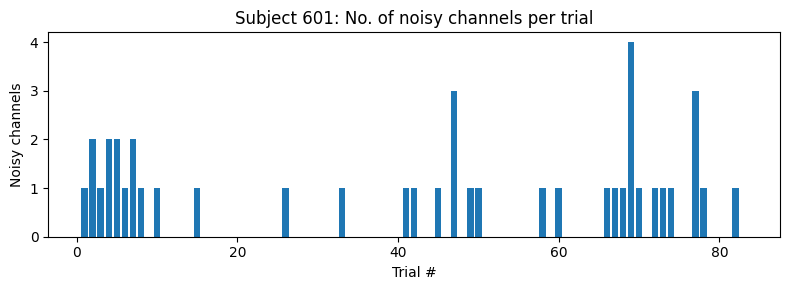

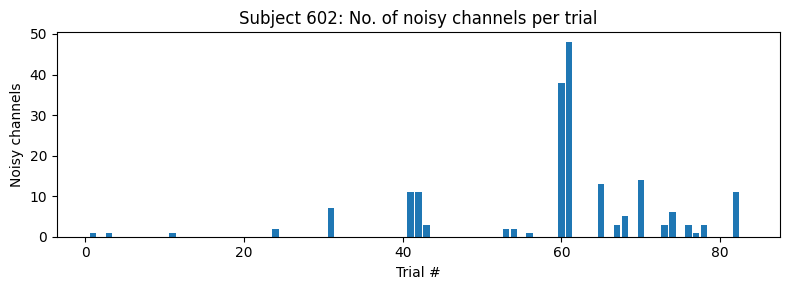

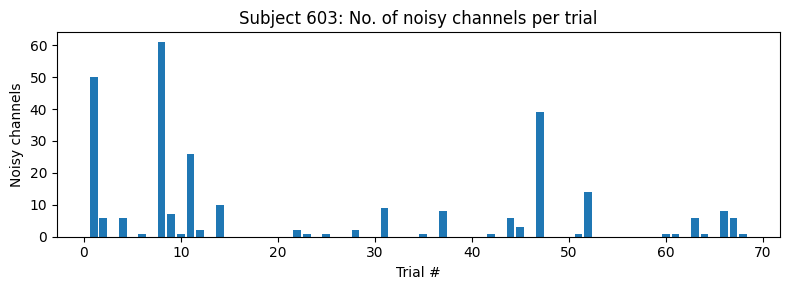

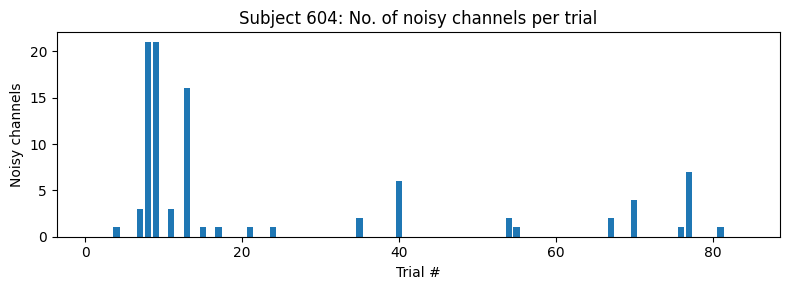

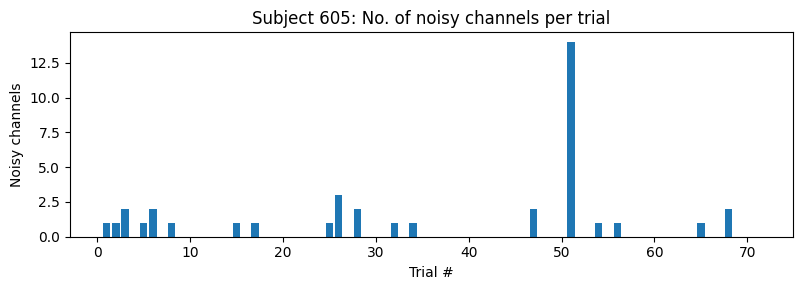

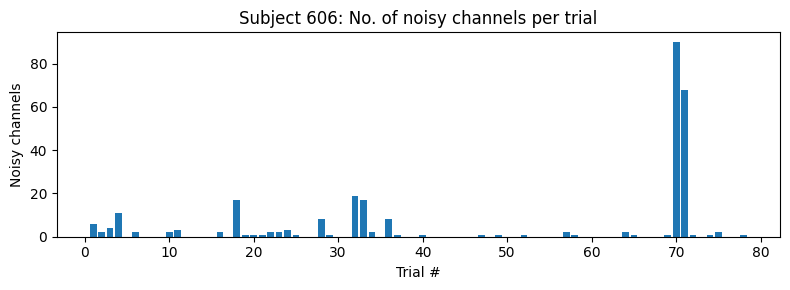

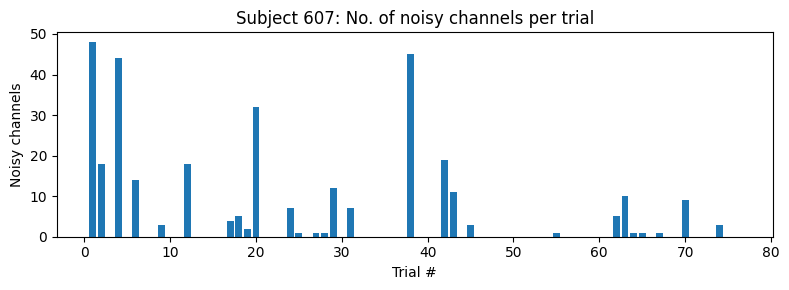

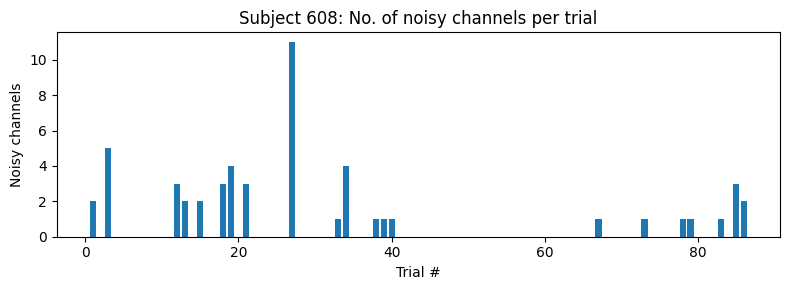

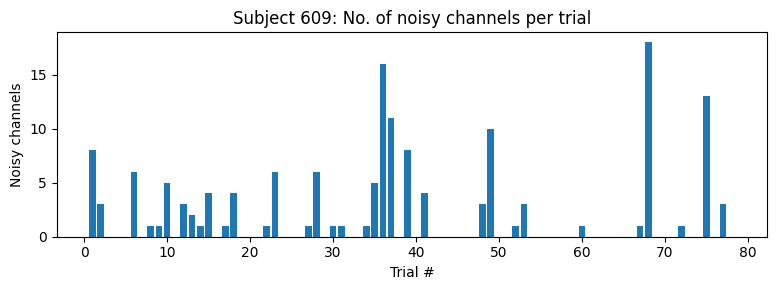

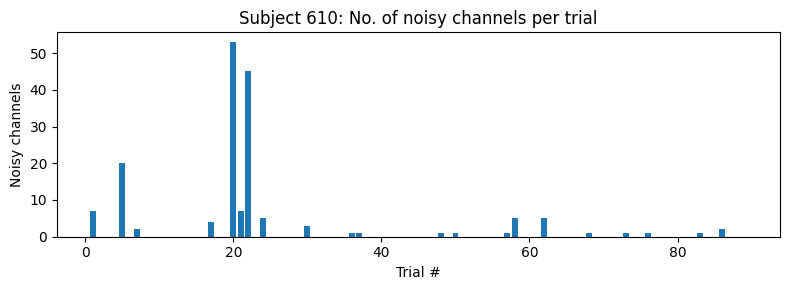

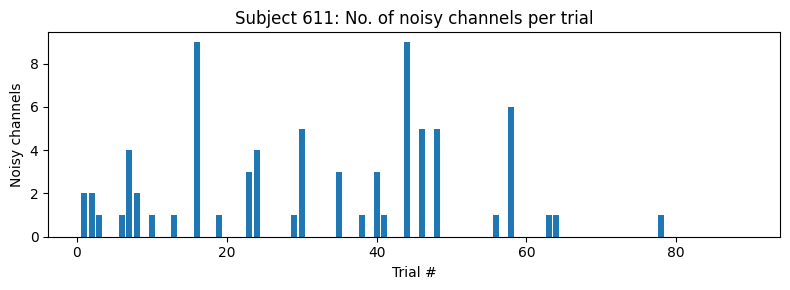

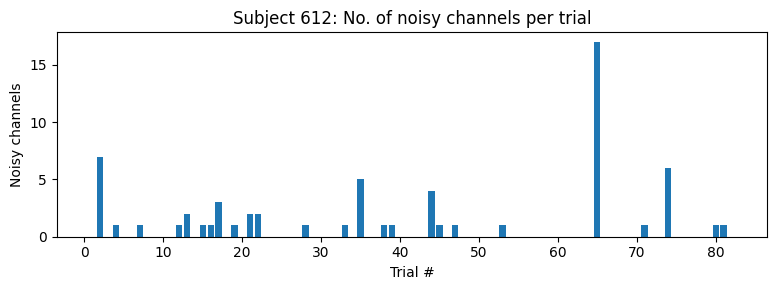

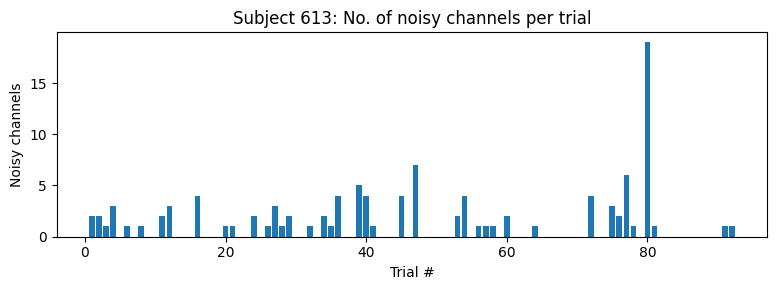

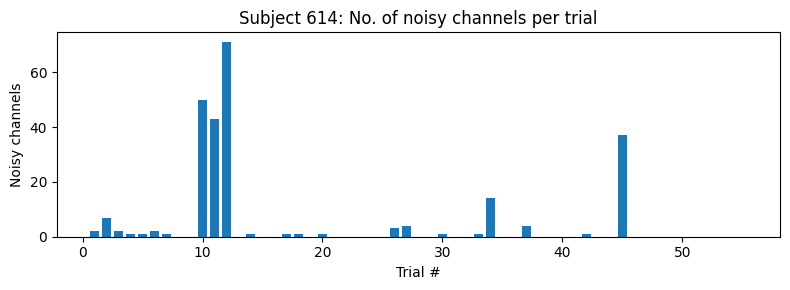

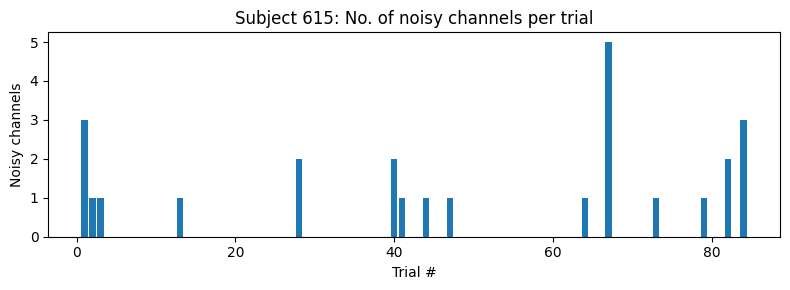

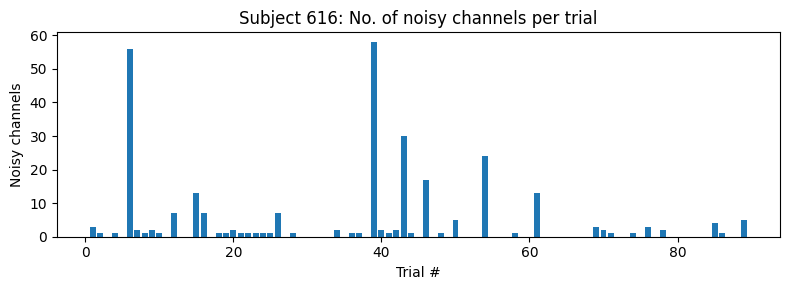

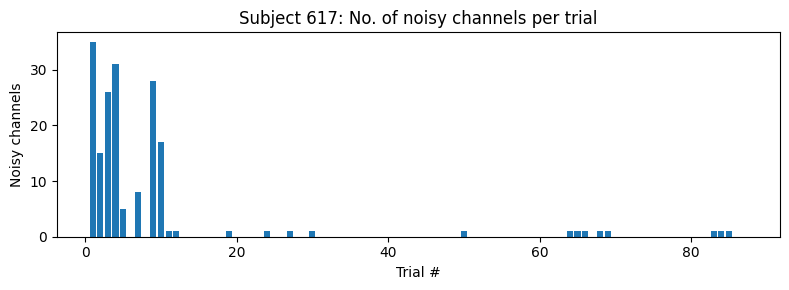

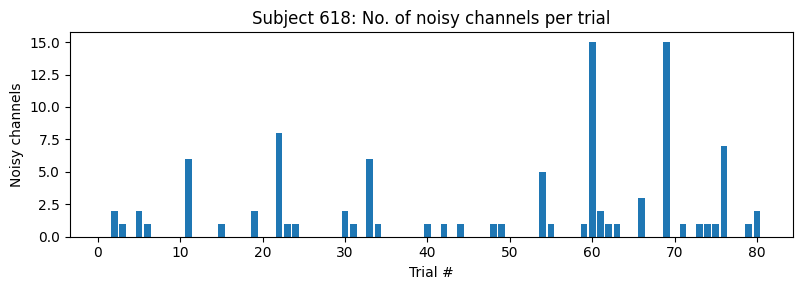

In [6]:

for subject, det in zip(subjects, all_detected):
    # Count noisy channels per trial
    det = det.T
    noisy_counts = det.sum(axis=1)        # sum across channels (True→1)
    n_trials = noisy_counts.shape[0]
    
    plt.figure(figsize=(8, 3))
    plt.bar(np.arange(1, n_trials+1), noisy_counts)
    plt.xlabel('Trial #')
    plt.ylabel('Noisy channels')
    plt.title(f'Subject {subject}: No. of noisy channels per trial')
    plt.tight_layout()
    plt.show()